1. IMPORTING LIBRARIES AND DOWNLOAD DATASET

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. LOADING THE DATASET

In [3]:
data=pd.read_csv(r"C:\Users\tirou\Downloads\abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.shape

(4177, 9)

GIVEN : ADDITION OF 1.5 TO TINGS COLUMN WILL GIVE THE AGE

In [ ]:
Age=data.Rings+1.5
data["Age"]=Age
data.head()

3. Perform Below Visualizations.
∙ Univariate Analysis
∙ Bi-Variate Analysis
∙ Multi-Variate Analysis

i)Univariate Analysis

<AxesSubplot:xlabel='Count', ylabel='Age'>

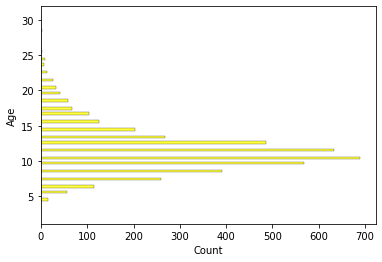

In [8]:
#HISTOGRAM
sns.histplot(y=data.Age,color='yellow') 

<AxesSubplot:xlabel='Age', ylabel='Count'>

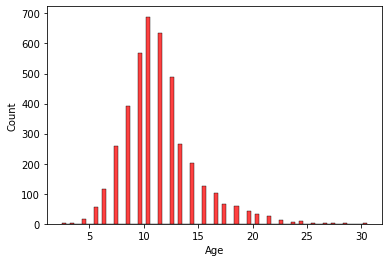

In [10]:
sns.histplot(x=data.Age,color='red') 

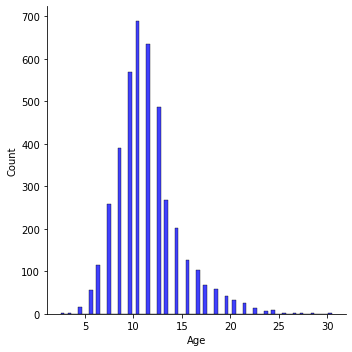

In [11]:
sns.displot(data["Age"], color='blue')

<AxesSubplot:xlabel='Age', ylabel='count'>

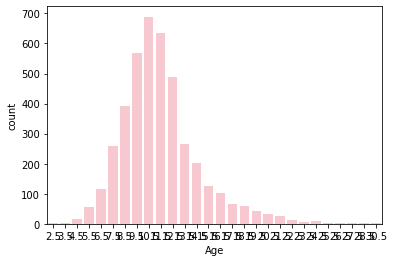

In [13]:
#COUNTPLOT
sns.countplot(x=data.Age,color='pink') 

<AxesSubplot:xlabel='Age'>

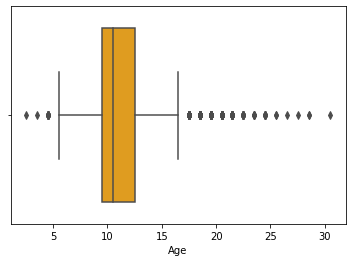

In [14]:
#BOXPLOT
sns.boxplot(x=data.Age,color='orange') 

BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Age', ylabel='Height'>

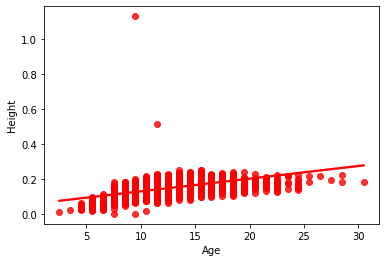

In [15]:
#Regplot
sns.regplot(x=data.Age,y=data.Height,color='red') 

<AxesSubplot:xlabel='Age', ylabel='Height'>

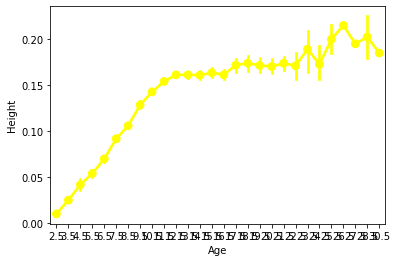

In [16]:
#Pointplot
sns.pointplot(x=data.Age, y=data.Height, color="yellow")

<AxesSubplot:xlabel='Age', ylabel='Height'>

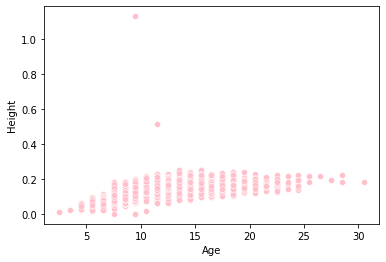

In [17]:
#Scatterplot
sns.scatterplot(x=data.Age,y=data.Height,color='pink')

<AxesSubplot:xlabel='Height', ylabel='Age'>

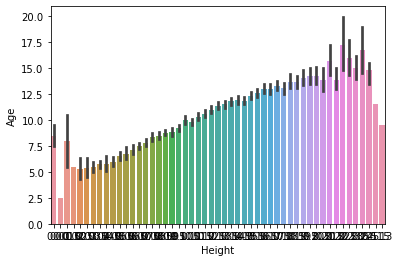

In [18]:
#Barplot
sns.barplot(x=data.Height,y=data.Age)

<AxesSubplot:xlabel='Age', ylabel='Height'>

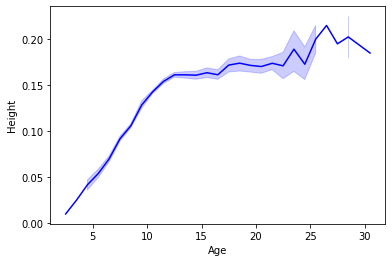

In [21]:
#Linearplot
sns.lineplot(x=data.Age,y=data.Height, color='blue')

MULTI- VARIATE ANALYSIS

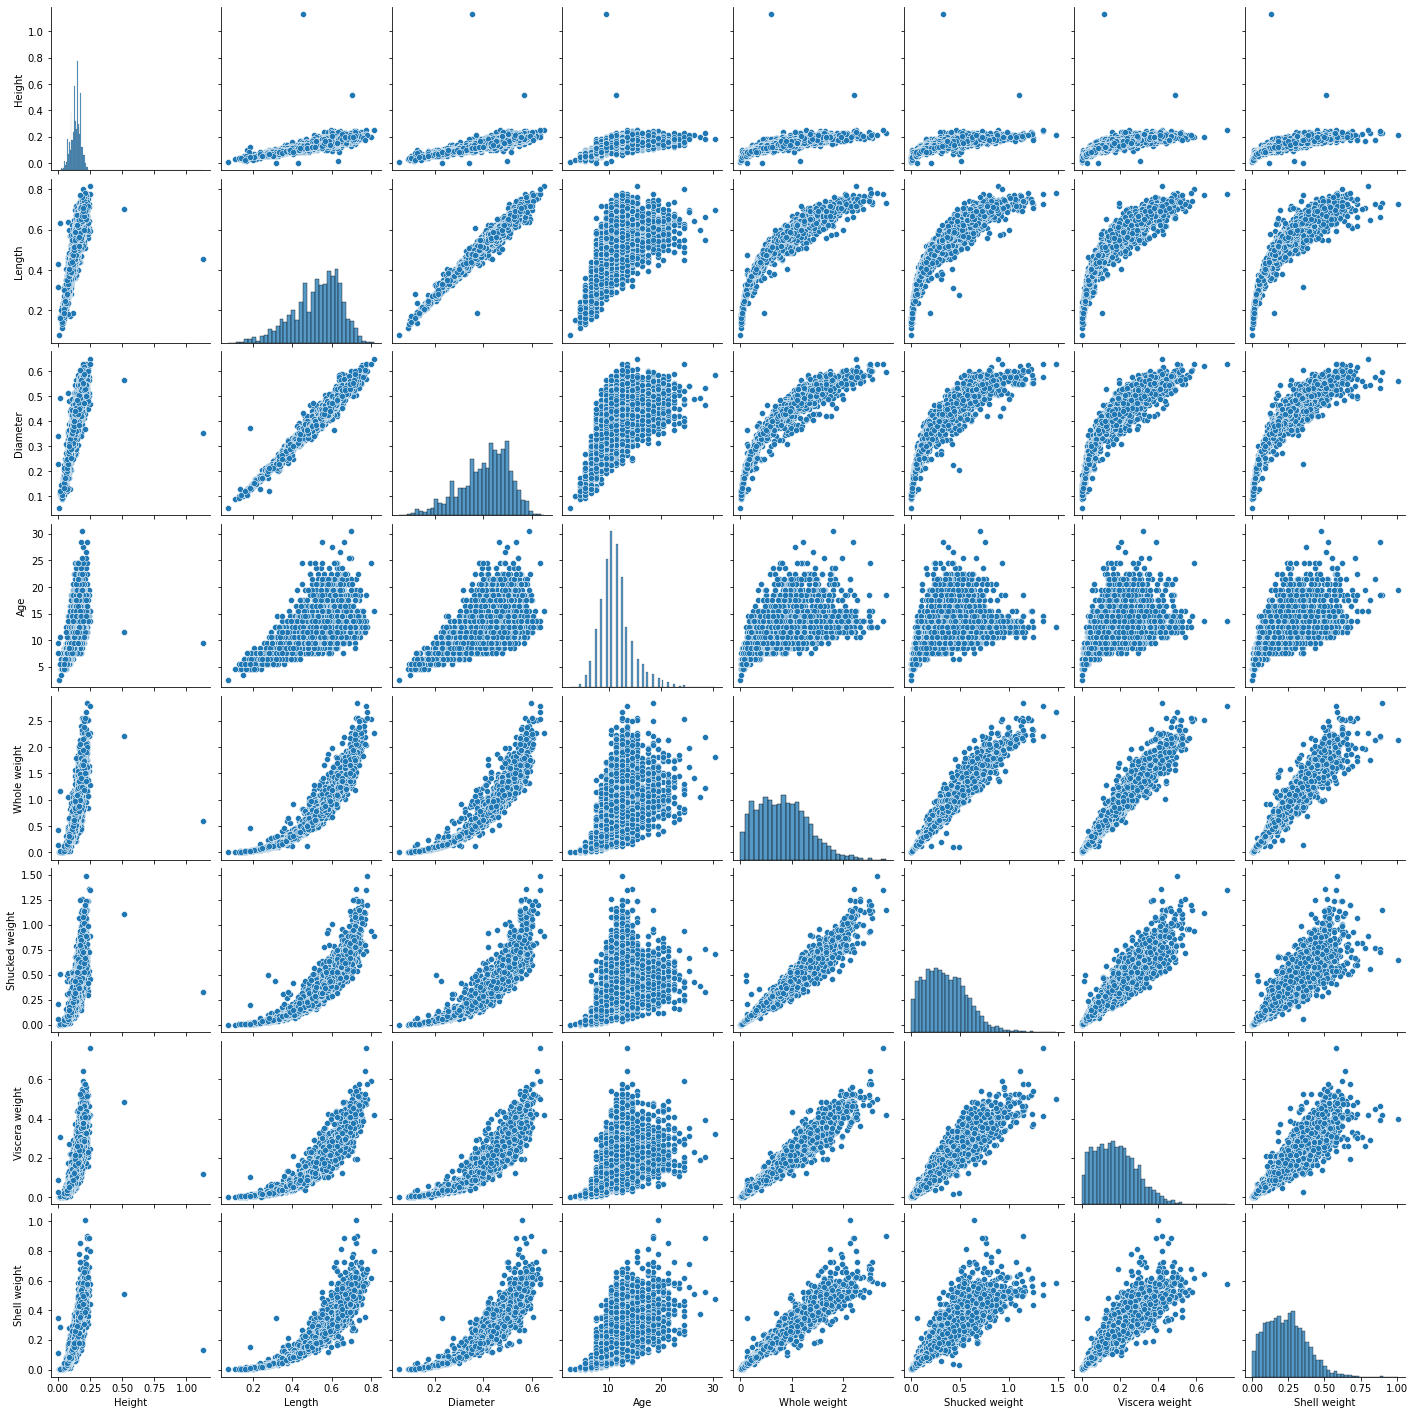

In [23]:
#Pairplot
sns.pairplot(data=data[["Height","Length","Diameter","Age","Whole weight","Shucked weight","Viscera weight","Shell weight"]])

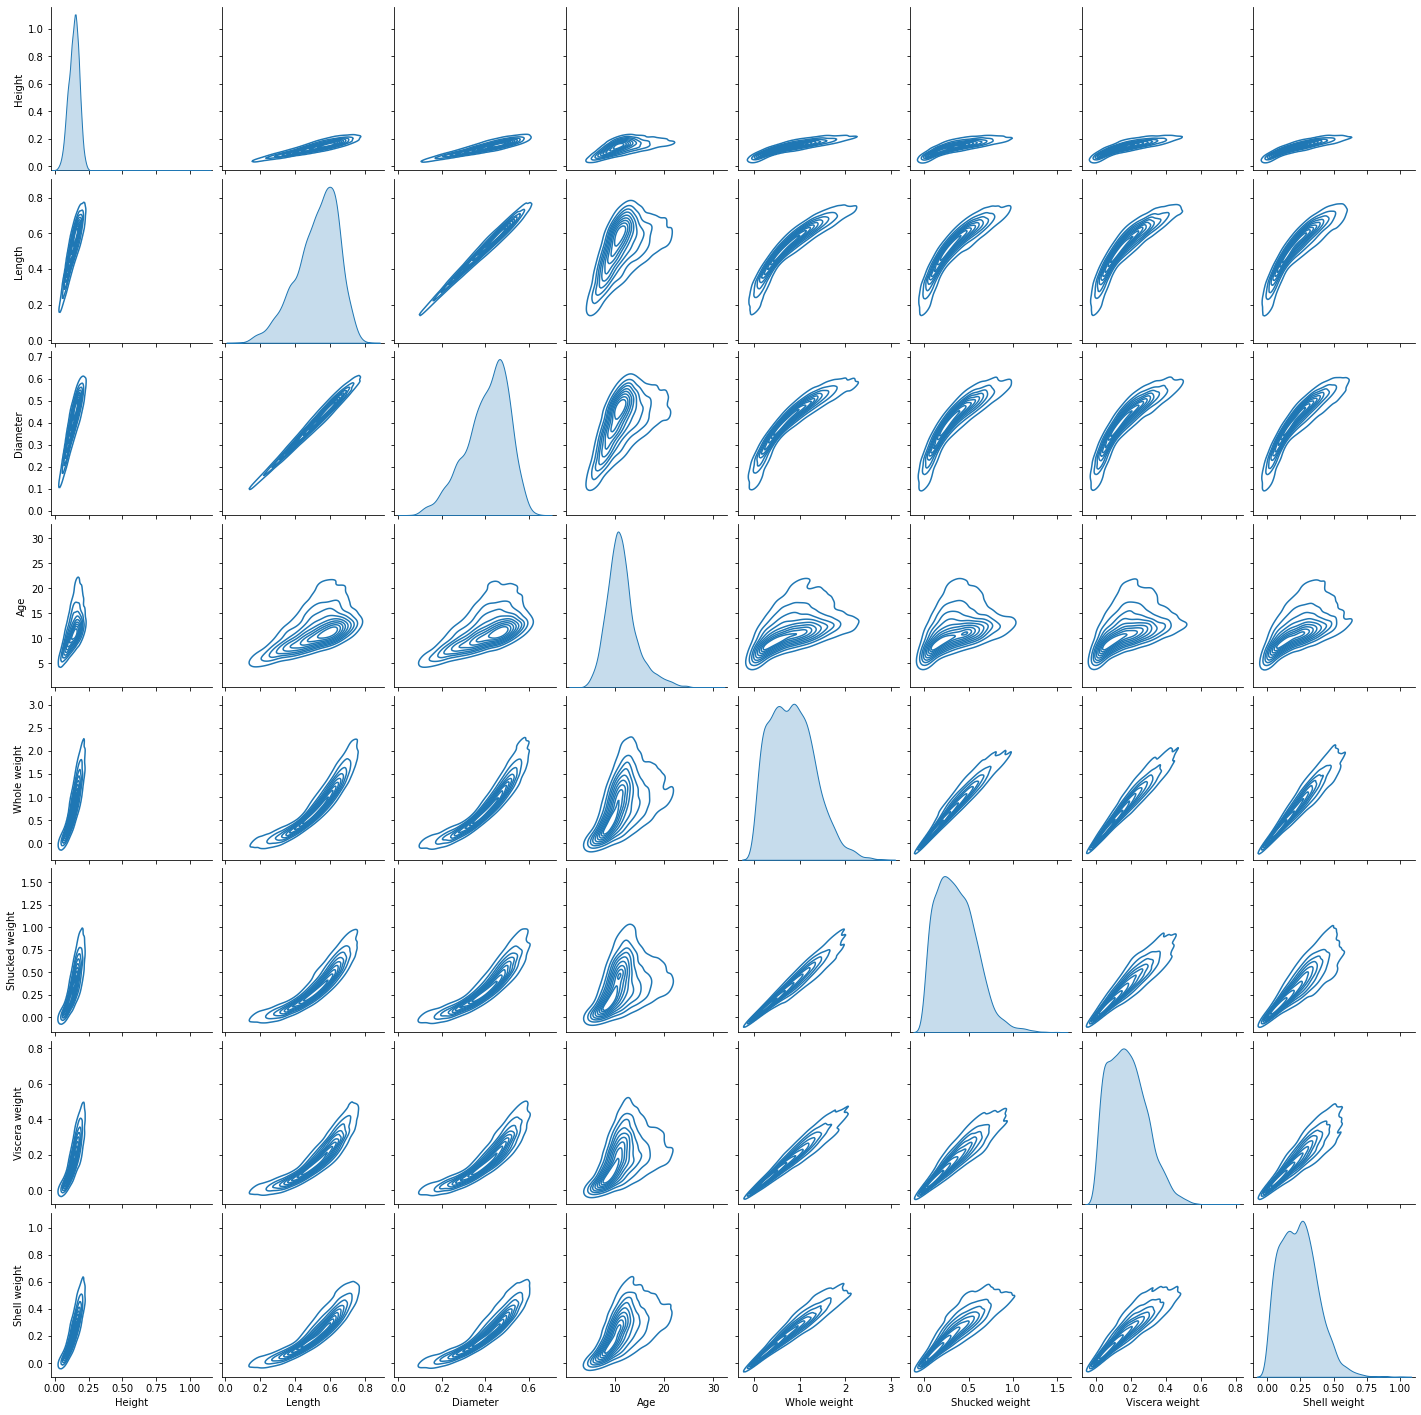

In [24]:
sns.pairplot(data=data[["Height","Length","Diameter","Age","Whole weight","Shucked weight","Viscera weight","Shell weight"]],kind="kde")

4. Perform descriptive statistics on the dataset.

In [25]:
data.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000


5. Check for Missing values and deal with them.

In [26]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

6. Find the outliers and replace them outliers

In [27]:
outliers=data.quantile(q=(0.25,0.75))
outliers

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,8.0,9.5
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,11.0,12.5


In [28]:
a = data.Age.quantile(0.25)
b = data.Age.quantile(0.75)
c = b - a
lower_limit = a - 1.5 * c
data.median(numeric_only=True)

Length             0.5450
Diameter           0.4250
Height             0.1400
Whole weight       0.7995
Shucked weight     0.3360
Viscera weight     0.1710
Shell weight       0.2340
Rings              9.0000
Age               10.5000
dtype: float64

<AxesSubplot:xlabel='Age'>

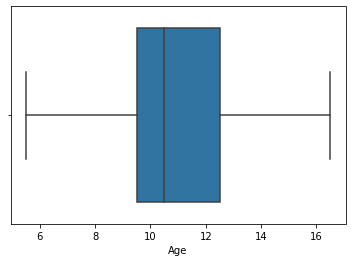

In [30]:
data['Age'] = np.where(data['Age'] < lower_limit, 7, data['Age'])
sns.boxplot(x=data.Age,showfliers = False)

7. Check for Categorical columns and perform encoding.

In [31]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [32]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
data.Sex = lab.fit_transform(data.Sex)

data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


8. Split the data into dependent and independent variables.

In [33]:
y = data["Sex"]
y.head()

0    2
1    2
2    0
3    2
4    1
Name: Sex, dtype: int32

In [34]:
x=data.drop(columns=["Sex"],axis=1)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


9. Scale the independent variables

In [35]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,1.577830
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,-0.919022
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,-0.294809
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,0.017298
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,-0.919022


10. Split the data into training and testing

In [36]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y,test_size=0.2,random_state=0)

11. Build the Model

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')
model.fit(X_Train,Y_Train)
y_predict = model.predict(X_Test)
y_predict_train = model.predict(X_Train)

12. Train the Model

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Training accuracy: ',accuracy_score(Y_Train,y_predict_train))

Training accuracy:  0.9811433702484286


13. Test the Model

In [39]:
print('Testing accuracy: ',accuracy_score(Y_Test,y_predict))

Testing accuracy:  0.5251196172248804


14. Measure the performance using Metrics.

In [40]:
pd.crosstab(Y_Test,y_predict)

col_0,0,1,2
Sex,,,
0,110,29,110
1,44,211,36
2,124,54,118


In [41]:
print(classification_report(Y_Test,y_predict))

              precision    recall  f1-score   support

           0       0.40      0.44      0.42       249
           1       0.72      0.73      0.72       291
           2       0.45      0.40      0.42       296

    accuracy                           0.53       836
   macro avg       0.52      0.52      0.52       836
weighted avg       0.53      0.53      0.52       836

